In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from bs4 import BeautifulSoup
import urllib.request

In [2]:
def partition_home_games(data = None, team = None):
    home_games = data.loc[(data['home-away-indicator']== '') & (data['home_team'] == team) ]
    return home_games

def partition_away_games(data=None, team= None):
    away_games = data.loc[data['home-away-indicator' ]== '@']
    return away_games

def extract_home_attendance_by_year(data = None, year = None, team = None):
    """ Function takes a dataframe of home team data, a target year and target team and provides
        the data for this filter.
    """
    dataset = partition_home_games(data, team)
    dataset_year = dataset.loc[dataset.year == year]
    dataset_year = dataset_year.groupby(['year','day', 'num-date','month']).sum()
    dataset_year = dataset_year.reset_index()
    #print(dataset_year.sort_values(by=['month', 'num-date'], axis=0, ascending = True, inplace=True))
    return dataset_year
    

In [3]:
mlb_data = pd.read_pickle('./mlb_data.pkl')
mlb_data.head(30)

,home-away-indicator,opponent,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,...,day_night,attendance,cLI,streak,year,home_team,day,month,num-date,multi-game
1,@,WSN,W,3,1,,1-0,1,Tied,Colon,...,D,42295.0,1.05,+,2015,NYM,Monday,Apr,6,None
2,@,WSN,L,1,2,,1-1,2,1.5,Zimmermann,...,N,25999.0,1.11,-,2015,NYM,Wednesday,Apr,8,None
3,@,WSN,W,6,3,,2-1,2,1.0,Harvey,...,D,25327.0,1.11,+,2015,NYM,Thursday,Apr,9,None
4,@,ATL,L,3,5,,2-2,2,2.0,Johnson,...,N,46279.0,1.16,-,2015,NYM,Friday,Apr,10,None
5,@,ATL,L,3,5,,2-3,3,3.0,Teheran,...,N,36056.0,1.16,--,2015,NYM,Saturday,Apr,11,None
6,@,ATL,W,4,3,,3-3,2,2.0,Colon,...,D,28192.0,1.08,+,2015,NYM,Sunday,Apr,12,None
7,,PHI,W,2,0,,4-3,2,2.0,deGrom,...,D,43947.0,1.10,++,2015,NYM,Monday,Apr,13,None
8,,PHI,W,6,5,,5-3,2,1.0,Harvey,...,N,39489.0,1.17,+++,2015,NYM,Tuesday,Apr,14,None
9,,PHI,W,6,1,,6-3,1,Tied,Niese,...,N,21052.0,1.18,++++,2015,NYM,Wednesday,Apr,15,None
10,,MIA,W,7,5,,7-3,1,up 0.5,Blevins,...,N,20556.0,1.23,+++++,2015,NYM,Thursday,Apr,16,None


date_thangs = mlb_data.date.str.split(" ", expand=True)
mlb_data['day'] = date_thangs[0].str.replace(",", " ").str.strip()
mlb_data.day.unique()
mlb_data['month'] = date_thangs[1]
mlb_data['num-date'] = date_thangs[2]
mlb_data['multi-game'] = date_thangs[3]
mlb_data.drop(columns=['date'], inplace=True)
#mlb_data.head()

<AxesSubplot:title={'center':'Overall live MLB Attendance Per Year'}, xlabel='year', ylabel='attendance'>

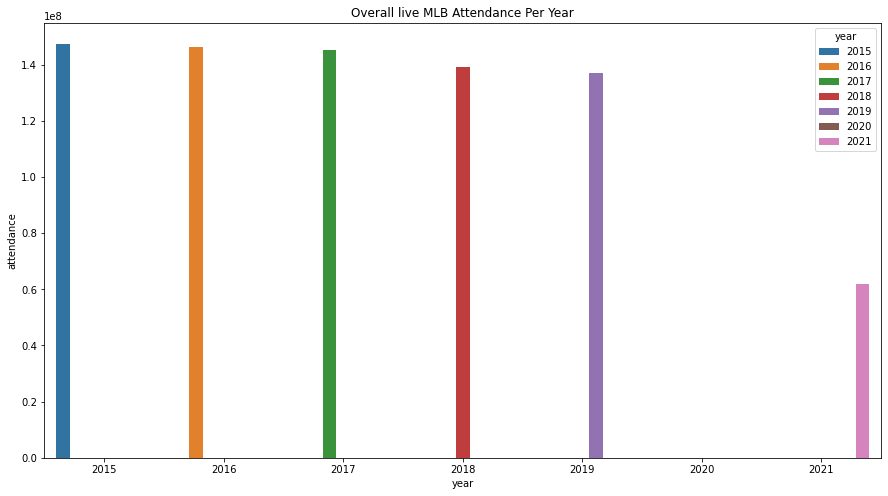

In [4]:
mlb_per_year = mlb_data.groupby(by=['year']).sum()
mlb_per_year = mlb_per_year.reset_index()
mlb_per_year.year
plt.figure(figsize=(15, 8))
plt.title('Overall live MLB Attendance Per Year')
plt.ylabel('Overall Attendance')
sns.barplot(x='year', y='attendance', hue='year', data=mlb_per_year)

C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

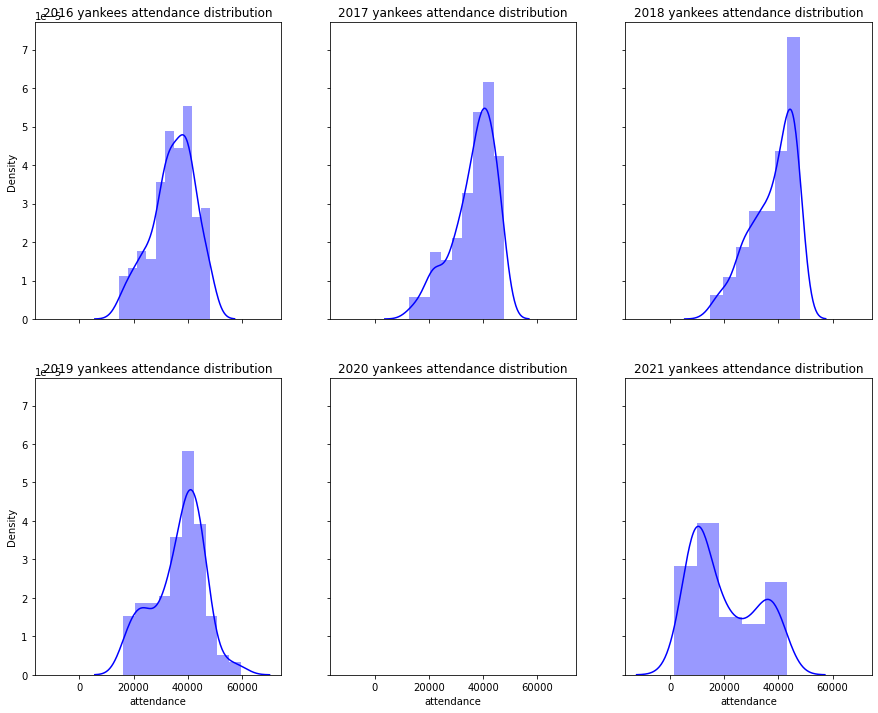

In [5]:
#PLot the yankees attendance from 2016 through 2021 with a probability density function

ynk_2016 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2016)& (~mlb_data.month.isin(['Sep']))]
ynk_2017 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2017)& (~mlb_data.month.isin(['Sep']))]
ynk_2018 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2018)& (~mlb_data.month.isin(['Sep']))]
ynk_2019 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2019)& (~mlb_data.month.isin(['Sep']))]
ynk_2020 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2020)& (~mlb_data.month.isin(['Sep']))]
ynk_2021 = mlb_data.loc[(mlb_data.home_team == 'NYY') & (mlb_data.year == 2021)& (~mlb_data.month.isin(['Sep']))]

##----------------------------------------------
fig, ax = plt.subplots(2,3, figsize=(15, 12), sharey=True, sharex=True)

sns.distplot(ax=ax[0,0],a=ynk_2016.attendance, color = 'b')
ax[0,0].set_title('2016 yankees attendance distribution')
sns.distplot(ax=ax[0,1],a=ynk_2017.attendance, color = 'b')
ax[0,1].set_title('2017 yankees attendance distribution')
sns.distplot(ax=ax[0,2],a=ynk_2018.attendance, color = 'b')
ax[0,2].set_title('2018 yankees attendance distribution')
sns.distplot(ax=ax[1,0],a=ynk_2019.attendance, color = 'b')
ax[1,0].set_title('2019 yankees attendance distribution')
sns.distplot(ax=ax[1,1],a=ynk_2020.attendance, color = 'b')
ax[1,1].set_title('2020 yankees attendance distribution')
sns.distplot(ax=ax[1,2],a=ynk_2021.attendance, color = 'b')
ax[1,2].set_title('2021 yankees attendance distribution')
plt.show()

In [6]:
year_list = [ynk_2016, ynk_2017, ynk_2018, ynk_2019]

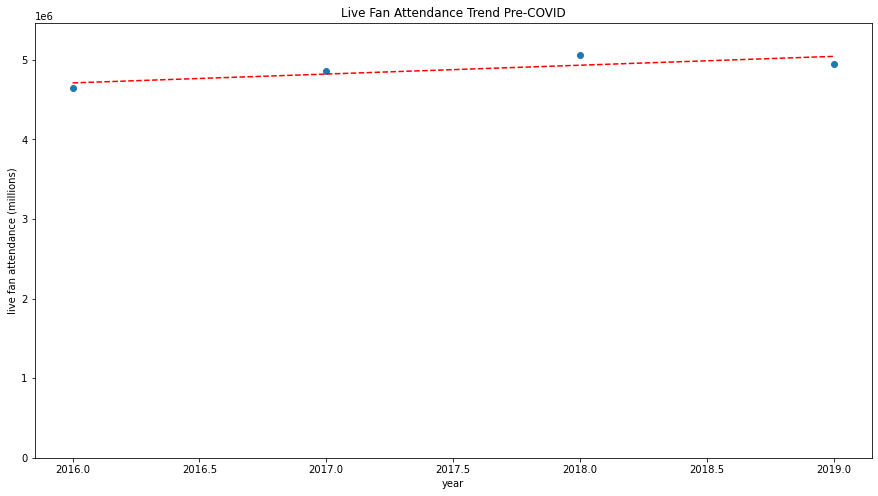

In [7]:
total_attendance = []
years = [2016, 2017, 2018, 2019]
for list in year_list:
    a = list.attendance.sum()
    total_attendance.append(a)

line = np.polyfit(x=years, y=total_attendance, deg=1)
trend = np.poly1d(line)

plt.figure(figsize=(15, 8))
plt.title('Live Fan Attendance Trend Pre-COVID')
plt.xlabel('year')
plt.ylabel('live fan attendance (millions)')
plt.scatter(years, total_attendance)
plt.ylim(0,max(total_attendance)+400000)
plt.plot(years,trend(years),"r--")
plt.show()



## Group the data by home_team and year, sum the attendees per year

In [8]:
agg = mlb_data.groupby(['home_team', 'year']).sum('attendance')

agg = agg.reset_index()

In [9]:
agg.loc[(agg.home_team == "NYY")& (agg.year==2021)]
yankee_dates = agg.loc[(agg.home_team == "NYY")& (agg.year==2021)]

In [10]:
agg = mlb_data.groupby(['home_team', 'year', 'month', 'num-date']).sum('attendance')
agg = agg.reset_index()
agg

agg.loc[(agg.home_team == "NYY")& (agg.year==2021)]
yankee_dates = agg.loc[(agg.home_team == "NYY")& (agg.year==2021)]
len(yankee_dates.loc[yankee_dates.month == 'Jul'])

22

In [11]:
team_list = mlb_data.home_team.unique().tolist()
stadiums={}
disruption = {}
for team in team_list:
    yearly_attendance = agg.loc[agg.home_team==team]
    #print(yearly_attendance)
    stadiums[team] = yearly_attendance
    

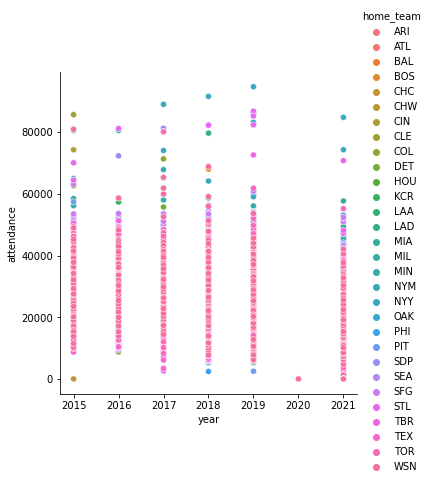

In [12]:
sns.relplot(data=agg, x='year', y='attendance', hue='home_team')

delta={}
for stadium in stadiums:
    #print(stadiums[stadium])
    data = stadiums[stadium]
    sns.relplot(data = data, x='year', y='attendance')
    title = data.home_team.iloc[0]
    print(title)
    #plt.title(title)
    plt.show()
    delta[stadium] = [stadiums[stadium].loc[stadiums[stadium].year == 2019],
                     stadiums[stadium].loc[stadiums[stadium].year == 2020],
                     stadiums[stadium].loc[stadiums[stadium].year == 2021]]
    #calculate the delta between attendance from 2019 into 2021 after the stadiums re-opened.
    print(stadiums[stadium].attendance.loc[stadiums[stadium].year == 2021].item()/stadiums[stadium].attendance.loc[stadiums[stadium].year == 2019].item())
    

No handles with labels found to put in legend.


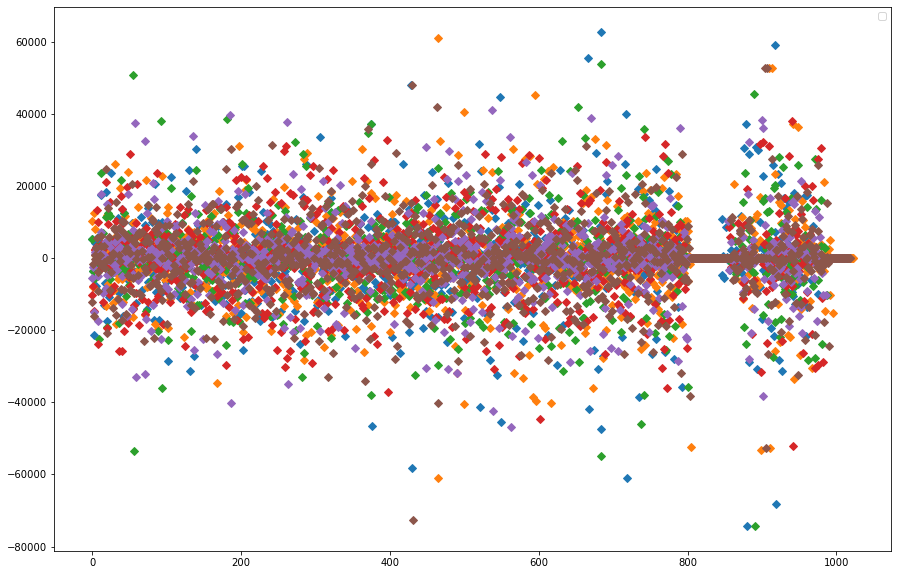

In [13]:
#plt.plot(stadiums['NYY'].attendance)
diff_amt = 1
plt.figure(figsize=(15, 10))
plt.plot(np.diff(stadiums['NYY'].attendance,diff_amt), ls="None", marker = 'D')
plt.plot(np.diff(stadiums['LAD'].attendance,diff_amt), ls="None", marker = 'D')
plt.plot(np.diff(stadiums['BOS'].attendance,diff_amt), ls="None", marker = 'D')
plt.plot(np.diff(stadiums['ATL'].attendance,diff_amt), ls="None", marker = 'D')
plt.plot(np.diff(stadiums['CHC'].attendance,diff_amt), ls="None", marker = 'D')
plt.plot(np.diff(stadiums['HOU'].attendance,diff_amt), ls="None", marker = 'D')
plt.legend()
plt.show()

In [14]:
yankees_home = partition_home_games(data = mlb_data, team = 'NYY')
yankees_home_2018 = extract_home_attendance_by_year(data= mlb_data, year=2018, team= 'NYY')
yankees_home_2019 = extract_home_attendance_by_year(data= mlb_data, year=2019, team= 'NYY')
yankees_home_2021 = extract_home_attendance_by_year(data= mlb_data, year=2021, team= 'NYY')



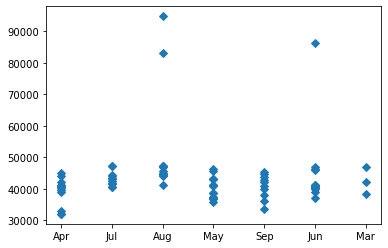

In [15]:
plt.plot(yankees_home_2019.month, yankees_home_2019.attendance, ls="None", marker = 'D')

<AxesSubplot:xlabel='month', ylabel='attendance'>

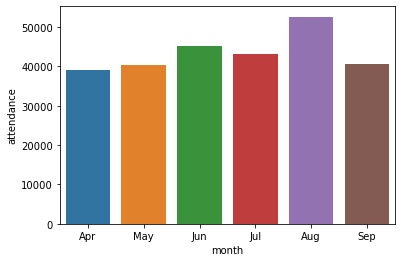

In [16]:
sns.barplot(data=yankees_home_2019, x='month', y = 'attendance', order =["Apr","May", "Jun", "Jul", "Aug", "Sep"], ci=None)

In [17]:

yankees_home_2021 = extract_home_attendance_by_year(data= mlb_data, year=2021, team= 'NYY')

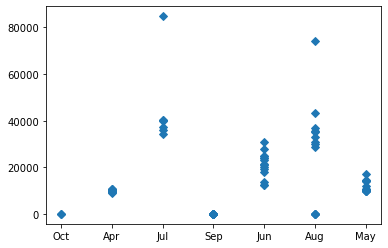

In [18]:
plt.plot(yankees_home_2021.month, yankees_home_2021.attendance, ls="None", marker = 'D')

<AxesSubplot:xlabel='month', ylabel='attendance'>

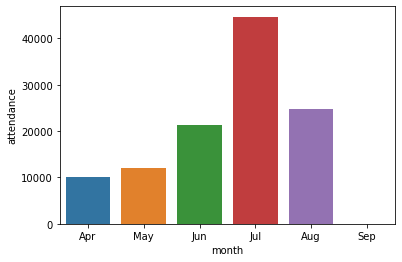

In [19]:
sns.barplot(data=yankees_home_2021, x='month', y = 'attendance', order =["Apr","May", "Jun", "Jul", "Aug", "Sep"], ci=None)

yankees_home = partition_home_games(data = mlb_data, team = 'NYY')
#yankees_home.info()
yankees_home.head(30)
yankees_home_2019 = yankees_home.loc[yankees_home.year == 2019]
a = yankees_home_2019.groupby(['year','day', 'num-date','month']).sum()
a = a.reset_index()
print(a.sort_values(by=['month', 'num-date'], axis=0, ascending = True, inplace=True))
sum = a.attendance.sum()
a.month.unique()


<AxesSubplot:title={'center':'Comparison of Yankees Monthy Live Attendance Before and During COVID'}, xlabel='month', ylabel='attendance'>

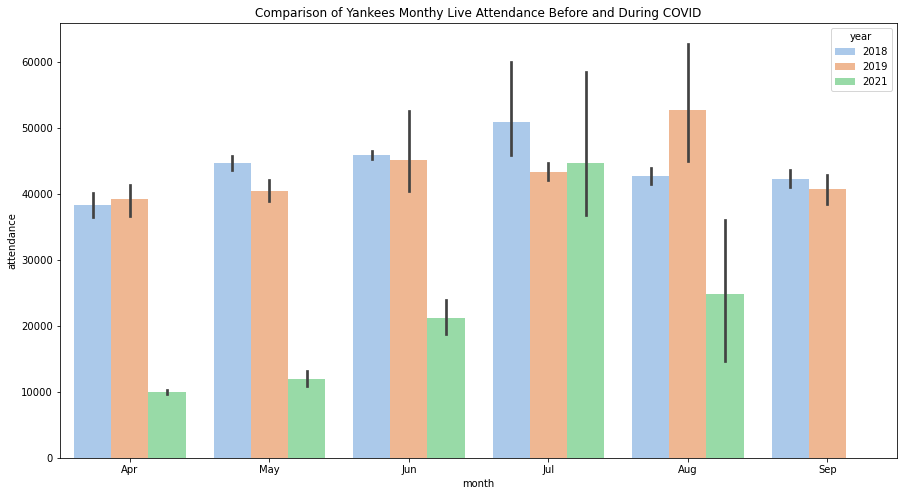

In [20]:
bigdata = pd.concat([yankees_home_2018,yankees_home_2019, yankees_home_2021], ignore_index=True, sort=False)
bigdata
#To-Do: increase the figure size
sns.set_palette('pastel')
plt.figure(figsize=(15, 8))
plt.title('Comparison of Yankees Monthy Live Attendance Before and During COVID')
sns.barplot(x='month', y='attendance', hue='year', data=bigdata, order =["Apr","May", "Jun", "Jul", "Aug", "Sep"])

In [51]:
yanks_year = mlb_data.loc[(mlb_data.year.isin([2015])) & (mlb_data.home_team == 'NYY')].sort_values(by= ['year','month','num-date'])

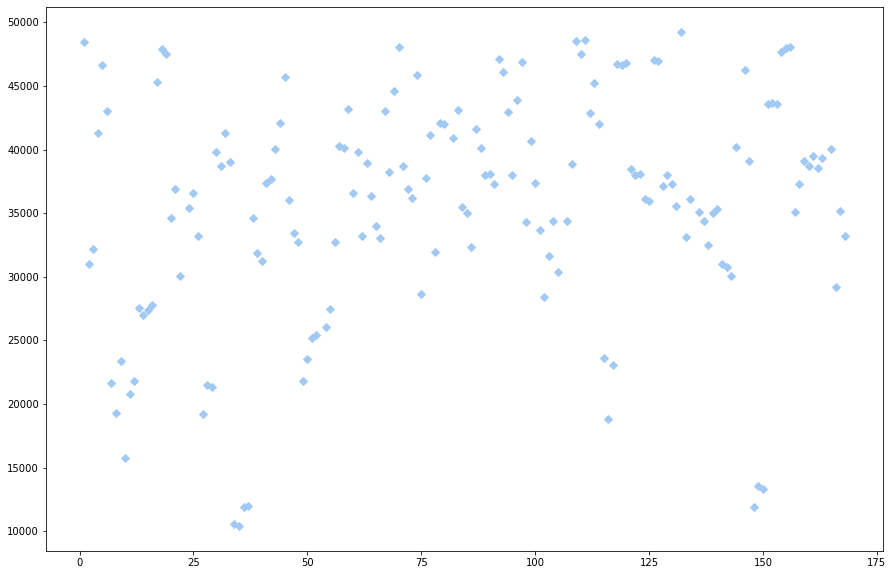

In [55]:

plt.figure(figsize=(15, 10))
plt.plot( yanks_year.attendance, ls="None", marker = 'D')


In [43]:
mlb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30946 entries, 1 to 167
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   home-away-indicator  30946 non-null  object 
 1   opponent             30946 non-null  object 
 2   win-loss-tie         30946 non-null  object 
 3   runs                 30946 non-null  object 
 4   runs_allowed         30946 non-null  object 
 5   innings              30946 non-null  object 
 6   record               30946 non-null  object 
 7   rank                 29684 non-null  object 
 8   gb                   29684 non-null  object 
 9   win                  29684 non-null  object 
 10  loss                 29684 non-null  object 
 11  save                 29684 non-null  object 
 12  time                 29684 non-null  object 
 13  day_night            29684 non-null  object 
 14  attendance           27728 non-null  float64
 15  cLI                  29684 non-null  o

In [57]:
yanks_year.head(-30)

,home-away-indicator,opponent,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,...,day_night,attendance,cLI,streak,year,home_team,day,month,num-date,multi-game
4,,BOS,L,5,6,19,1-3,4,2.0,Wright,...,N,41292.0,.99,--,2015,NYY,Friday,Apr,10,None
5,,BOS,L,4,8,,1-4,5,3.0,Kelly,...,D,46678.0,.93,---,2015,NYY,Saturday,Apr,11,None
6,,BOS,W,14,4,,2-4,5,2.0,Tanaka,...,N,43019.0,.86,+,2015,NYY,Sunday,Apr,12,None
7,@,BAL,W,6,5,,3-4,4,2.0,Pineda,...,N,21633.0,.90,++,2015,NYY,Monday,Apr,13,None
8,@,BAL,L,3,4,,3-5,5,3.0,Gonzalez,...,N,19283.0,.98,-,2015,NYY,Tuesday,Apr,14,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,,BAL,W,4,3,,18-11,1,up 3.0,Eovaldi,...,N,39816.0,1.36,+,2015,NYY,Thursday,May,7,None
31,,BAL,W,5,4,,19-11,1,up 3.0,Betances,...,N,38731.0,1.40,++,2015,NYY,Friday,May,8,None
32,,BAL,L,2,6,,19-12,1,up 2.0,Chen,...,D,41280.0,1.37,-,2015,NYY,Saturday,May,9,None
165,,BOS,W,4,1,,87-72,2,5.0,Sabathia,...,N,40033.0,.21,+,2015,NYY,Thursday,Oct,1,None
